# Photon correlation spectroscopy development
### M. L. Whittaker 
### 26 June 2025

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import skew, kurtosis
from scipy.optimize import curve_fit
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import PowerTransformer

import pct

## DLS

In [2]:
path2 = '/Users/mwhittaker/Library/CloudStorage/GoogleDrive-mwhittaker@lbl.gov/My Drive/LDRD_FY25/data/SISV_1%/18.5C/Measurement 3/Repetition 4/Count Trace.csv'

In [3]:
data = pd.read_csv(path2, skiprows=2)

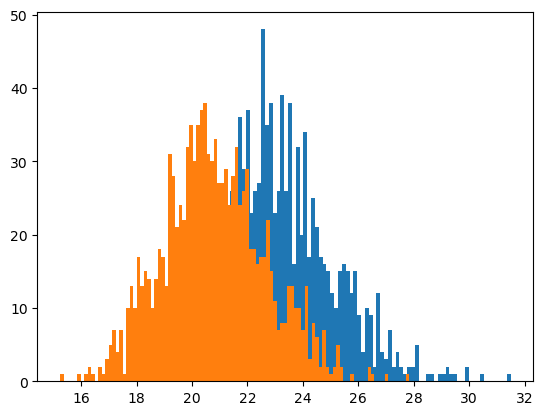

In [4]:
plt.hist(data['CR CHA [kHz]'], bins=100)
plt.hist(data['CR CHB [kHz]'], bins=100); plt.show()

In [5]:
from scipy.stats import ks_2samp
from scipy.stats import anderson_ksamp
from scipy.stats import shapiro

# Perform the Kolmogorov-Smirnov test
ks_statistic, p_value = ks_2samp(data['CR CHA [kHz]'], data['CR CHB [kHz]'])

# Perform the Anderson-Darling test
result = shapiro(data['CR CHA [kHz]'])

# Output results
print(f'Kolmogorov-Smirnov statistic: {ks_statistic:.4f}')
print(f'p-value: {p_value:.4e}')

# Output results
print(f'Shapiro-Wilk statistic: {result.statistic:.4f}')
print(f'p-value: {result.pvalue:.4e}')

Kolmogorov-Smirnov statistic: 0.4421
p-value: 1.4125e-100
Shapiro-Wilk statistic: 0.9897
p-value: 3.6095e-07


In [6]:
data = data[['CR CHA [kHz]', 'CR CHB [kHz]']].values

In [7]:
power = PowerTransformer(method='yeo-johnson', standardize=True)
tdata = power.fit_transform(data)

In [8]:
power.lambdas_

array([-0.62833942,  0.01149782])

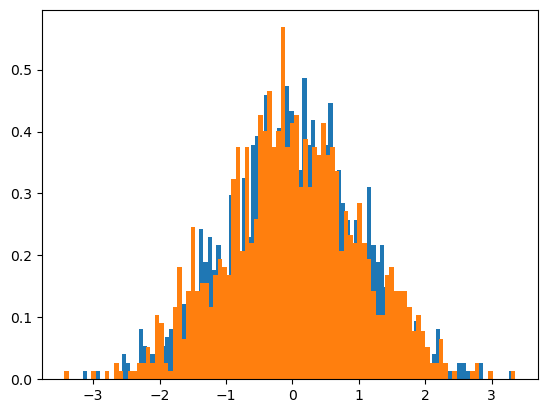

In [9]:
plt.hist(tdata[:,0], bins=100, density=True)
plt.hist(tdata[:,1], bins=100, density=True); plt.show()

In [10]:
# Perform the Kolmogorov-Smirnov test
ks_statistic, p_value = ks_2samp(tdata[:,0], tdata[:,1])

# Perform the Anderson-Darling test
result = shapiro([tdata[:,0]])

# Output results
print(f'Kolmogorov-Smirnov statistic: {ks_statistic:.4f}')
print(f'p-value: {p_value:.4e}')

# Output results
print(f'Shapio-Wilk statistic: {result.statistic:.4f}')
print(f'p-value: {result.pvalue:.4e}')

Kolmogorov-Smirnov statistic: 0.0237
p-value: 9.0666e-01
Shapio-Wilk statistic: 0.9991
p-value: 8.4004e-01


In [11]:
for i in range(3):
    gmm = GaussianMixture(random_state=42, n_components=i+1)
    gmm_data = gmm.fit(tdata[:,0].reshape(-1,1))
    print(f'bic_{i+1}: {gmm_data.bic(tdata[:,0].reshape(-1,1))}')
    print(f'aic_{i+1}: {gmm_data.aic(tdata[:,0].reshape(-1,1))}')

bic_1: 3249.2574227900004
aic_1: 3239.1798557072234
bic_2: 3275.2153041637753
aic_2: 3250.0213864568327
bic_3: 3291.738937029347
aic_3: 3251.4286686982387


In [12]:
print(gmm_data.means_)
print(gmm_data.covariances_)

[[-1.17387613]
 [ 1.10212596]
 [-0.00522999]]
[[[0.38148677]]

 [[0.41869843]]

 [[0.25557992]]]


In [15]:
path2 = '/Users/mwhittaker/Library/CloudStorage/GoogleDrive-mwhittaker@lbl.gov/My Drive/LDRD_FY25/data/SISV_1%/18.5C'

In [16]:
pct1 = pct.Dataloader(path2)
data = pct1.load()

In [17]:
cf = data.experiments['Measurement 1']['measurements'][0]['repetitions']['Correlation Function.csv']

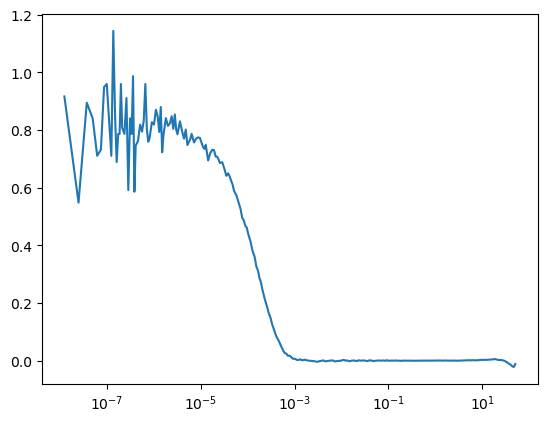

In [19]:
plt.plot(cf['Lag time [s]'], cf['Value'])
plt.xscale('log')

counts/second * photons/count * seconds = photons/second

((y+1)**l - 1) / l

In [20]:
print(skew(water_data['CR CHB [kHz]']))
print(kurtosis(water_data['CR CHB [kHz]']))

NameError: name 'water_data' is not defined

In [21]:
stats.probplot(water_pt_data[:,1], dist='norm', plot=plt)
stats.probplot(water_pt_data[:,1], dist='norm', plot=plt)
plt.show()

NameError: name 'water_pt_data' is not defined

In [86]:
savedir = '/Users/mwhittaker/Library/CloudStorage/GoogleDrive-mwhittaker@lbl.gov/My Drive/LDRD_FY25/images/'

In [291]:
def line(x, m, b):
    return m * x + b

def exp(x, a, b, c):
    return a * np.exp(-b * x) + c

In [422]:
path2 = '/Users/mwhittaker/Library/CloudStorage/GoogleDrive-mwhittaker@lbl.gov/My Drive/LDRD_FY25/data/SISV_1%/11.5C'
data2= pd.read_csv(path2 + '/SISV_1%_11.5C.csv', skiprows=3)

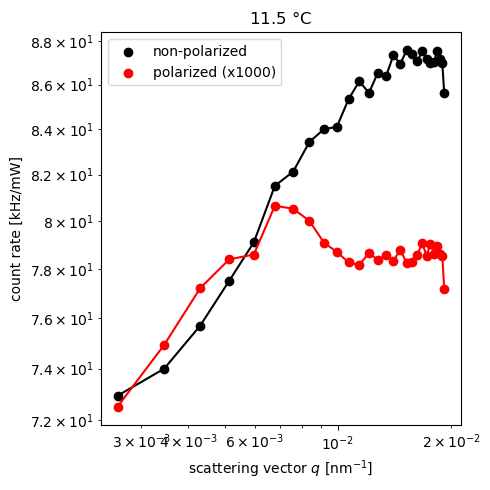

In [423]:
subset1 = data2[::3]
subset2 = data2[2::3]
correction = np.ones(len(subset1)) * 1400
angles = 4 * np.pi * (1/632.8) * np.sin(np.deg2rad(subset1['Scattering angle [deg]'])/2)
# subset1_popt, subset1_pcov = curve_fit(exp, angles[-3::], (subset1['Scaled count rate [kHz/mW]'] * correction)[-3::], p0=[1,1,1])

fig = plt.figure(figsize=(5, 5))
plt.scatter(angles, subset2['Scaled count rate [kHz/mW]'], color='k', label='non-polarized')
plt.plot(angles, subset2['Scaled count rate [kHz/mW]'], color='k')

plt.scatter(angles, subset1['Scaled count rate [kHz/mW]']*correction, color='r', label='polarized (x1000)')
plt.plot(angles, subset1['Scaled count rate [kHz/mW]']*correction, color='r')

plt.xlabel('scattering vector $q$ [nm$^{-1}$]')
plt.xscale('log')
plt.ylabel('count rate [kHz/mW]')
plt.yscale('log')
plt.legend()
plt.title(r'11.5 $\degree$C')
plt.tight_layout()

plt.savefig(savedir + "SISV_guinier_11C.png")
plt.show()

In [444]:
path2 = '/Users/mwhittaker/Library/CloudStorage/GoogleDrive-mwhittaker@lbl.gov/My Drive/LDRD_FY25/data/SISV_1%/15C'
data2= pd.read_csv(path2 + '/SISV_1%_15C.csv', skiprows=3)
data2extra =  pd.read_csv(path2 + '/SISV_1%_15C_40to15.csv', skiprows=3)

data2 = pd.concat([data2extra, data2], ignore_index=True)

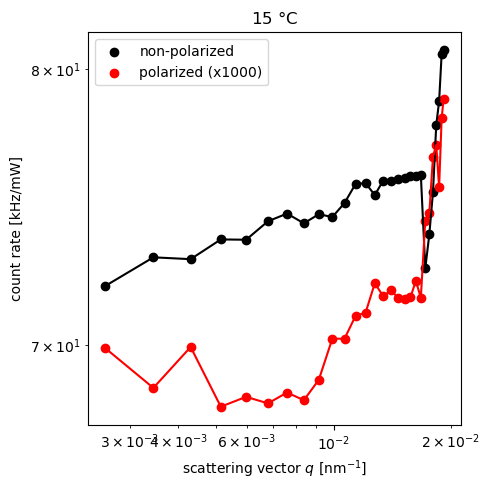

In [445]:
subset1 = data2[:-2:3]
subset2 = data2[2::3]
correction = np.ones(len(subset1)) * 1500
correction[-1] *= 0.55
 
# subset1_popt, subset1_pcov = curve_fit(exp, angles[-4::], (subset1['Scaled count rate [kHz/mW]'] * correction)[-4::], p0=[0,0,0])

fig = plt.figure(figsize=(5, 5))
plt.scatter(angles, subset2['Scaled count rate [kHz/mW]'], color='k', label='non-polarized')
plt.plot(angles, subset2['Scaled count rate [kHz/mW]'], color='k')

plt.scatter(angles, subset1['Scaled count rate [kHz/mW]'] * correction, color='r', label='polarized (x1000)')
plt.plot(angles, subset1['Scaled count rate [kHz/mW]'] * correction, color='r')

plt.xlabel('scattering vector $q$ [nm$^{-1}$]')
plt.xscale('log')
plt.ylabel('count rate [kHz/mW]')
plt.yscale('log')
plt.legend()
plt.title(r'15 $\degree$C')
plt.tight_layout()

plt.savefig(savedir + "SISV_guinier_15C.png")
plt.show()

In [446]:
path2 = '/Users/mwhittaker/Library/CloudStorage/GoogleDrive-mwhittaker@lbl.gov/My Drive/LDRD_FY25/data/SISV_1%/18.5C'
data2= pd.read_csv(path2 + '/SISV_1%_18.5C.csv', skiprows=3)

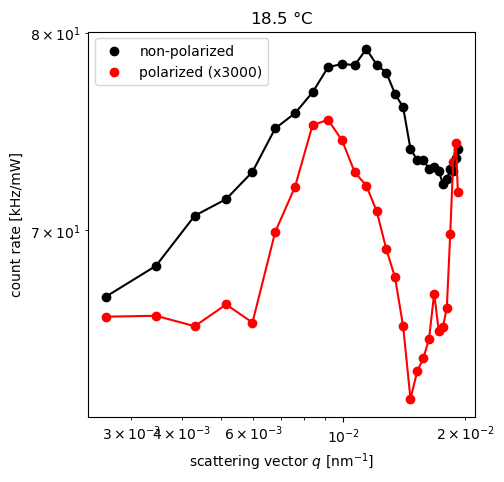

In [447]:
subset1 = data1[::3]
subset2 = data1[2::3]
correction = np.ones(len(subset1)) * 3000
correction[-8] *= 5/7.4
correction[-9] *= 1.03
correction[-11] *= 1.01

subset1_popt, subset1_pcov = curve_fit(exp, angles[-5::], (subset1['Scaled count rate [kHz/mW]'] * correction)[-5::], p0=[1,1,1])

fig = plt.figure(figsize=(5, 5))
plt.scatter(angles, subset2['Scaled count rate [kHz/mW]'], color='k', label='non-polarized')
plt.plot(angles, subset2['Scaled count rate [kHz/mW]'], color='k')

plt.scatter(angles, subset1['Scaled count rate [kHz/mW]']*correction - exp(angles, *subset1_popt) + 66, color='r', label='polarized (x3000)')
plt.plot(angles, subset1['Scaled count rate [kHz/mW]']*correction - exp(angles, *subset1_popt) + 66, color='r')

plt.xlabel('scattering vector $q$ [nm$^{-1}$]')
plt.xscale('log')
plt.ylabel('count rate [kHz/mW]')
plt.yscale('log')
plt.legend()
plt.title(r'18.5 $\degree$C')


plt.savefig(savedir + "SISV_guinier_18C.png")
plt.show()

In [428]:
path2 = '/Users/mwhittaker/Library/CloudStorage/GoogleDrive-mwhittaker@lbl.gov/My Drive/LDRD_FY25/data/SISV_1%/22C'
data2= pd.read_csv(path2 + '/SISV_MAPCS_1.csv', skiprows=3)

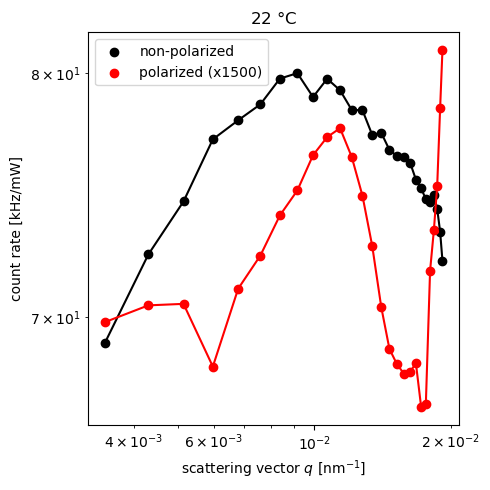

In [429]:
subset1 = data2[::3]
subset2 = data2[2::3]
correction = np.ones(len(subset1)) * 1500
angles = 4 * np.pi * (1/632.8) * np.sin(np.deg2rad(subset1['Scattering angle [deg]'])/2)
subset1_popt, subset1_pcov = curve_fit(exp, angles[-5::], (subset1['Scaled count rate [kHz/mW]'] * correction)[-5::], p0=[0,0,0])

fig = plt.figure(figsize=(5, 5))
plt.scatter(angles, subset2['Scaled count rate [kHz/mW]'], color='k', label='non-polarized')
plt.plot(angles, subset2['Scaled count rate [kHz/mW]'], color='k')

plt.scatter(angles, subset1['Scaled count rate [kHz/mW]'] * correction - exp(angles, *subset1_popt) + 70, color='r', label='polarized (x1500)')
plt.plot(angles, subset1['Scaled count rate [kHz/mW]'] * correction - exp(angles, *subset1_popt) + 70, color='r')

plt.xlabel('scattering vector $q$ [nm$^{-1}$]')
plt.xscale('log')
plt.ylabel('count rate [kHz/mW]')
plt.yscale('log')
plt.legend()
plt.title(r'22 $\degree$C')
plt.tight_layout()

plt.savefig(savedir + "SISV_guinier_22C.png")
plt.show()

In [432]:
path2 = '/Users/mwhittaker/Library/CloudStorage/GoogleDrive-mwhittaker@lbl.gov/My Drive/LDRD_FY25/data/SISV_1%/25.5C'
data2= pd.read_csv(path2 + '/7_3_2025 4_44_15 PM.csv', skiprows=3)

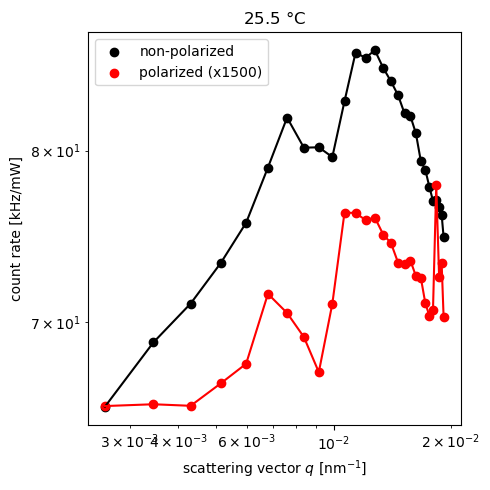

In [433]:
subset1 = data2[:-2:3]
subset2 = data2[2::3]
correction = np.ones(len(subset1)) * 1500
correction[-8] *= 5/7.7
angles = 4 * np.pi * (1/632.8) * np.sin(np.deg2rad(subset1['Scattering angle [deg]'])/2)
# subset1_popt, subset1_pcov = curve_fit(exp, angles[-3::], (subset1['Scaled count rate [kHz/mW]'] * correction)[-3::], p0=[1,1,1])

fig = plt.figure(figsize=(5, 5))
plt.scatter(angles, subset2['Scaled count rate [kHz/mW]'], color='k', label='non-polarized')
plt.plot(angles, subset2['Scaled count rate [kHz/mW]'], color='k')

plt.scatter(angles, subset1['Scaled count rate [kHz/mW]'] * correction, color='r', label='polarized (x1500)')
plt.plot(angles, subset1['Scaled count rate [kHz/mW]'] * correction, color='r')

plt.xlabel('scattering vector $q$ [nm$^{-1}$]')
plt.xscale('log')
plt.ylabel('count rate [kHz/mW]')
plt.yscale('log')
plt.legend()
plt.title(r'25.5 $\degree$C')
plt.tight_layout()

plt.savefig(savedir + "SISV_guinier_25C.png")
plt.show()

In [434]:
path2 = '/Users/mwhittaker/Library/CloudStorage/GoogleDrive-mwhittaker@lbl.gov/My Drive/LDRD_FY25/data/SISV_1%/28C'
data2= pd.read_csv(path2 + '/SISV_1%_28C.csv', skiprows=3)

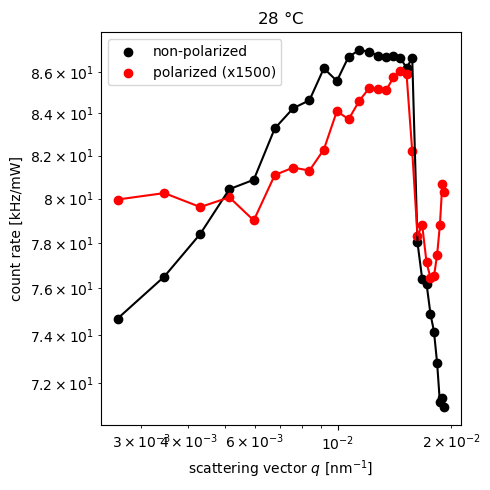

In [435]:
subset1 = data2[:-2:3]
subset2 = data2[2::3]
correction = np.ones(len(subset1)) * 1500
correction[-8] *= 5/7.3
 
subset1_popt, subset1_pcov = curve_fit(exp, angles[-6::], (subset1['Scaled count rate [kHz/mW]'] * correction)[-6::], p0=[1,1,1])

fig = plt.figure(figsize=(5, 5))
plt.scatter(angles, subset2['Scaled count rate [kHz/mW]'], color='k', label='non-polarized')
plt.plot(angles, subset2['Scaled count rate [kHz/mW]'], color='k')

plt.scatter(angles, subset1['Scaled count rate [kHz/mW]'] * correction - exp(angles, *subset1_popt) + 80, color='r', label='polarized (x1500)')
plt.plot(angles, subset1['Scaled count rate [kHz/mW]'] * correction - exp(angles, *subset1_popt) + 80, color='r')

plt.xlabel('scattering vector $q$ [nm$^{-1}$]')
plt.xscale('log')
plt.ylabel('count rate [kHz/mW]')
plt.yscale('log')
plt.legend()
plt.title(r'28 $\degree$C')
plt.tight_layout()

plt.savefig(savedir + "SISV_guinier_28C.png")
plt.show()

In [436]:
path2 = '/Users/mwhittaker/Library/CloudStorage/GoogleDrive-mwhittaker@lbl.gov/My Drive/LDRD_FY25/data/SISV_1%/30.5C'
data2= pd.read_csv(path2 + '/SISV_1%_30.5C.csv', skiprows=3)

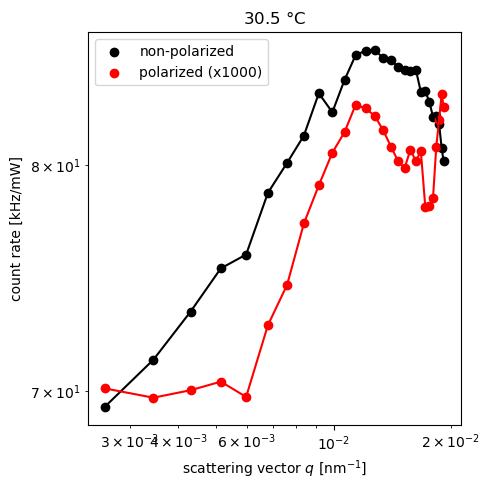

In [437]:
subset1 = data2[::3]
subset2 = data2[2::3]
correction = np.ones(len(subset1)) * 1000

subset1_popt, subset1_pcov = curve_fit(exp, angles[-5::], (subset1['Scaled count rate [kHz/mW]'] * correction)[-5::], p0=[1,1,1])

fig = plt.figure(figsize=(5, 5))
plt.scatter(angles, subset2['Scaled count rate [kHz/mW]'], color='k', label='non-polarized')
plt.plot(angles, subset2['Scaled count rate [kHz/mW]'], color='k')

plt.scatter(angles, subset1['Scaled count rate [kHz/mW]']*correction - exp(angles, *subset1_popt) + 70, color='r', label='polarized (x1000)')
plt.plot(angles, subset1['Scaled count rate [kHz/mW]']*correction - exp(angles, *subset1_popt) + 70, color='r')

plt.xlabel('scattering vector $q$ [nm$^{-1}$]')
plt.xscale('log')
plt.ylabel('count rate [kHz/mW]')
plt.yscale('log')
plt.legend()
plt.title(r'30.5 $\degree$C')
plt.tight_layout()

plt.savefig(savedir + "SISV_guinier_30C.png")
plt.show()

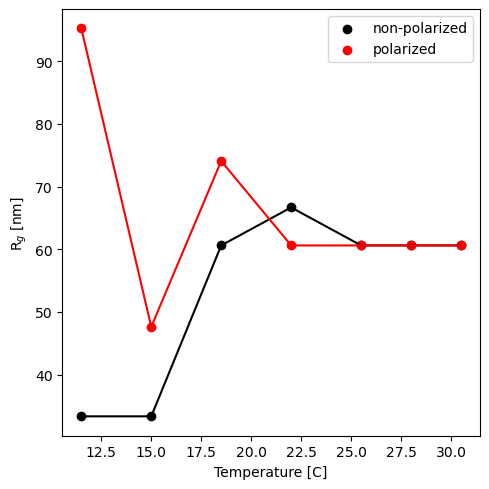

In [473]:
temps = np.array([11.5, 15, 18.5, 22, 25.5, 28, 30.5])
R_gs = 2/3 * 1/np.array([2e-2, 2e-2, 1.1e-2, 1e-2, 1.1e-2, 1.1e-2, 1.1e-2])
R_gps = 2/3 * 1/np.array([7e-3, 0.0140, 9e-3, 1.1e-2, 1.1e-2, 1.1e-2, 1.1e-2])

fig = plt.figure(figsize=(5, 5))
plt.scatter(temps, R_gs, color='k', label='non-polarized')
plt.plot(temps, R_gs, color='k')

plt.scatter(temps, R_gps, color='r', label='polarized')
plt.plot(temps, R_gps, color='r')

plt.xlabel('Temperature [C]')
plt.ylabel('R$_g$ [nm]')

plt.legend()
plt.tight_layout()

plt.savefig(savedir + "SISV_Rg.png")
plt.show()

In [474]:
R_gs

array([33.33333333, 33.33333333, 60.60606061, 66.66666667, 60.60606061,
       60.60606061, 60.60606061])

In [2]:
path_to_all = '/Users/mwhittaker/Library/CloudStorage/GoogleDrive-mwhittaker@lbl.gov/My Drive/LDRD_FY25/data/SISV_1%/18.5C/'
pct1 = pct.Dataloader(path_to_all)
pct_data = pct1.load()

In [3]:
pct_data.experiments['Measurement 1']['measurements'][0]['repetitions']['CORENN Gamma Results.csv']

,Relative amount,Average [nm],Coefficient of variation,Skewness
0,99.3436303348018,3016.38650198963,0.415633202821553,0.601774
1,0.656369665198235,96621.3569053822,0.0300422205634577,-0.957756
2,Gamma distribution,NaN,NaN,NaN
3,Decay Rate [1/s],Relative Intensity,Cumulative Relative Intensity,NaN
4,1E-05,0,0,NaN
...,...,...,...,...
1513,0.1966080125,0.000559581048668098,-6.82548514616155E-05,NaN
1514,0.2097152125,0.000559581048668098,3.13922270143684E-05,NaN
1515,0.2359296125,0.000559581048668098,0.000586328846862103,NaN
1516,0.2621440125,0.000559581048668098,3.80117856966766E-05,NaN


In [19]:
keys = pct_data.experiments.keys()
keys_polarized = np.array(list(keys))[::3]
keys_isotropic = np.array(list(keys))[2::3]

gammas = np.ones((len(keys_polarized), 2))

for i, k in enumerate(keys_polarized):
    gamma_pol = pct_data.experiments[k]['measurements'][0]['repetitions']['CORENN Gamma Results.csv']['Average [nm]']
    print(gamma_pol[:10])
    gammas[i, 0] = gamma_pol[0]

for i, k in enumerate(keys_isotropic):
    gamma_iso = pct_data.experiments[k]['measurements'][0]['repetitions']['CORENN Gamma Results.csv']['Average [nm]'][0]
    gammas[i, 1] = gamma_iso

0      3016.38650198963
1      96621.3569053822
2                   NaN
3    Relative Intensity
4                     0
5                     0
6                     0
7                     0
8                     0
9                     0
Name: Average [nm], dtype: object
0      2427.26425005662
1                   NaN
2    Relative Intensity
3                     0
4                     0
5                     0
6                     0
7                     0
8                     0
9                     0
Name: Average [nm], dtype: object
0       2296.5036784692
1                   NaN
2    Relative Intensity
3                     0
4                     0
5                     0
6                     0
7                     0
8                     0
9                     0
Name: Average [nm], dtype: object
0        2215.705832616
1                   NaN
2    Relative Intensity
3                     0
4                     0
5                     0
6                     0
7         

In [17]:
gammas

array([[3016.38650199, 2499.90421106],
       [2427.26425006, 2414.79860893],
       [2296.50367847, 2292.26715315],
       [2215.70583262, 2694.23040961],
       [2167.97129962, 3029.47338656],
       [2093.09992243, 3038.76407424],
       [1923.6475854 , 3023.05383903],
       [1859.23668377, 1864.80437259],
       [2949.07109066, 1725.69499193],
       [2949.86579155, 1585.76566867],
       [          nan, 1469.04416759],
       [3075.43740563, 1403.01021933],
       [1341.53591249, 1201.50076396],
       [1213.76771772, 1103.12781146],
       [1143.73270576, 2688.10700209],
       [1025.27471563, 3432.06933468],
       [ 922.70857345, 2778.17105056],
       [ 783.25450296, 3356.26833176],
       [ 694.44752381,  686.00331248],
       [2203.056451  ,  564.94127269],
       [3173.41386702,  491.60276684],
       [3167.00516589,  395.56129198],
       [3069.42849741,  288.04982047],
       [ 311.98202436,  240.44015697],
       [ 237.05127016,  173.56195306],
       [ 175.38129387, 25